# 1 Introduction

This notebook contains a walkthrough of the univariate linear gradient descent for Andrew Ng's Machine Learning Coursera course. The course exercises are meant to be performed in MATLAB or Octave, but I personally wanted to do it in Python to improve upon those skillsets. 

First we will import the standard analytical and plotting libraries that are going to be used.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next we read in the data from the provided CSV. The file contains two columns. The first column is the population of a city and the second column is the profit of a food truck in that city (both in 10,000's). I name the columns and the print the first five rows to see the data. 

In [3]:
df = pd.read_csv('ex1data1.txt')

In [4]:
df.columns = ['Population', 'Profit']

In [5]:
df.head()

,Population,Profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


Here we look at some standard statistical measures of our data using the describe method. This is just to get a better idea of how are data is distributed.

In [42]:
df.describe()

,Population,Profit
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


# 2 Visualizing the Data

Next we would like to take a look at the data visually to get a feel for how it is distributed and the approach we should be using. We know beforehand that this is an exercise for univariate linear regression, so we should expect linear data. 

The first plot we look at is a standard scatter plot. We see from this scatter plot that the data is in fact linear. We have population ranging from about 50,000 to about 225,000, and profit ranging from approxaimately -\\$30,000 to about \\$250,000.

Text(0.5, 1.0, 'Profit vs Population for Food Trucks')

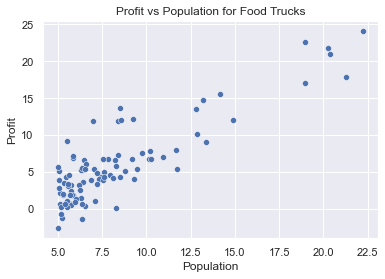

In [41]:
sns.scatterplot(data=df, x = 'Population', y='Profit')
plt.title('Profit vs Population for Food Trucks')

The next two plots we look at are distribution plots with kernal density estimation (KDE). These plots allow us to see how the data is distributed among the dataset. Although it is clear from the scatter plot where most of our data is lumped, the distribution plots allow us to better undestand the relationship by counting the number of instances of data falling between two values. 

First the population distribution. We see that the cities that range in population from approimately 50,000 to 62,500 make up the most number of data points in our set and there is a general dropoff as the population gets larger. This should intuitively make sense as there is more cities with smaller populations than cities with larger populations. 

The second distribution plot is focused on profit. We see a small number of foodtrucks are losing money, then there is a quick increase in the number of data points to a profit of approximately \\$50,000, then a steep drop off until a few data points with profits on the order of \\$200,000 - \\$225,000.

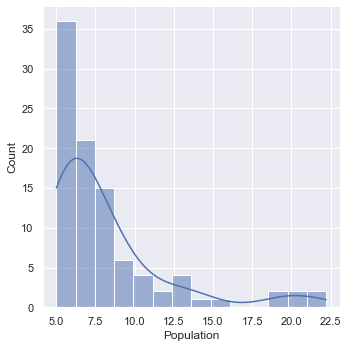

In [7]:
sns.displot(df['Population'], kde=True)

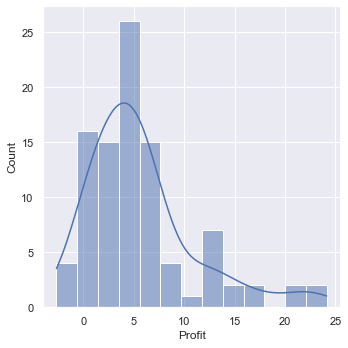

In [8]:
sns.displot(df['Profit'], kde=True)

# 3 Computing the Cost of Errors

Now that we have an idea of what our data looks like, we want to find a line that best describes that set of data. Finding this line allows us to predict the profit from our food trucks in different cities based on their populations. 

Given that we are going to try and find a straight line to fit this data, our line if given by the equation:

<center>$h_{\theta}(x)=\theta_0 + \theta_1x$</center>

The $\theta$'s are called parameters and we adjust those parameters to change how the line lays on the plot through the data. We choose $\theta_0$ and $\theta_1$ so that $h_\theta(x)$ is close to $y$ for our training examples $(x,y)$.

We want the difference between $h(x)$ and $y$ to be small. So we want to minimize:

<center>$J(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]^2$</center>

This is our cost function, or sometimes called the squared-error cost function. Let's write a function to compute this cost. 




This line of code pulls the values out of the dataframe as a numpy array. 

In [44]:
data = df.values

The variable m is the number of training examples that we have. Here I set it to the length of the number of data points for profit that we have. 

In [45]:
m = len(data[:,-1]) # all rows, last column

We set up $X$ by creating an array where the first colomn is all 1's (for $x_0$) and then the column for the population data. 

In [46]:
X = np.append(np.ones((m,1)), data[:,0].reshape(m,1),axis=1)

We set up $y$ by creating an array of the profit data. 

In [47]:
y = data[:,1].reshape(m,1)

And start with both $\theta_0$ and $\theta_1$ as 0. 

In [48]:
theta = np.zeros((2,1))

Our computeCost function takes in all three of X, y, and theta and takes advantage of linear algebra properties to simplify the math via the dot product. We square the errors and then return the cost after scaling it by 1/(2m).

In [49]:
def computeCost(X,y,theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions-y)**2
    return 1/(2*m) * np.sum(square_err)

For our inital guess of $\theta_0 = 0$ and $\theta_1 = 0$, our cost comes to be 30.79.

In [51]:
computeCost(X,y,theta)

30.79495785534583

# 4 Gradient Descent

To improve the cost of our line, we implement gradient descent. Gradient descent changes the values of theta

In [30]:
def gradientDescent(X,y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions-y))
        descent = alpha * 1/m * error
        theta -= descent
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [29]:
alpha = 0.01
num_iters = 1500

In [31]:
theta,J_history = gradientDescent(X,y, theta, alpha, num_iters)

In [32]:
theta

array([[-3.92643901],
       [ 1.1849957 ]])

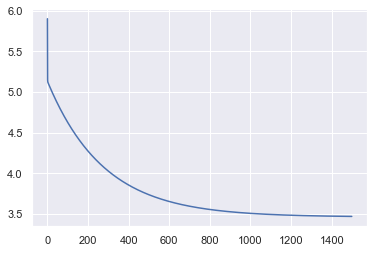

In [33]:
plt.plot(J_history)

Text(0.5, 1.0, 'Profit vs Population')

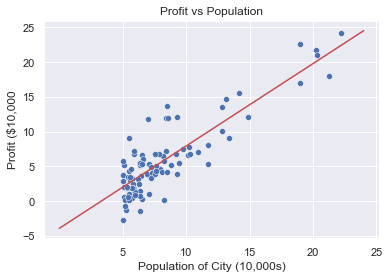

In [39]:
sns.scatterplot(data=df, x = 'Population', y='Profit')
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")

Borrowed some implementation of the gradient descent from: https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137